# Figure_6.03: Solidity results of different classifiers compared

In this notebook, the solidity of different classifiers was compared
- size-shape-based classifier
- shape-based classifier
- size-shape-intensity-based classifier

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
#folders
classifier_label_folder_size_shape = '../crystal data/5. classification labels/5. size + shape/'
classifier_label_folder_shape = '../crystal data/5. classification labels/3. shape/'
classifier_label_folder_shape_intensity = '../crystal data/5. classification labels/6. shape + intensity/'
classifier_label_folder_size_shape_intensity = '../crystal data/5. classification labels/7. size + shape + intensity/'

In [3]:
#tables
#all labels (after size exclusion)
table_all = pd.read_csv('all_measurements_normalized_image.csv')
table_all_testing = pd.read_csv('testing_all_measurements_normalized_image.csv')
table_all_both = pd.concat([table_all, table_all_testing], ignore_index = True)

#only good labels size + shape
good_crystals_training_size_shape = pd.read_csv('good_crystals_size_shape.csv')
good_crystals_testing_size_shape = pd.read_csv('testing_good_crystals_size_shape.csv')
good_crystals_both_size_shape = pd.concat([good_crystals_training_size_shape, good_crystals_testing_size_shape], ignore_index = True)

#only good labels shape 
good_crystals_training_shape = pd.read_csv('good_crystals_shape.csv')
good_crystals_testing_shape = pd.read_csv('testing_good_crystals_shape.csv')
good_crystals_both_shape = pd.concat([good_crystals_training_shape, good_crystals_testing_shape], ignore_index = True)

#only good labels shape + intensity
good_crystals_training_shape_intensity = pd.read_csv('good_crystals_shape_intensity.csv')
good_crystals_testing_shape_intensity = pd.read_csv('testing_good_crystals_shape_intensity.csv')
good_crystals_both_shape_intensity = pd.concat([good_crystals_training_shape_intensity, good_crystals_testing_shape_intensity], ignore_index = True)

#only good labels size + shape + intensity
good_crystals_training_size_shape_intensity = pd.read_csv('good_crystals_size_shape_intensity.csv')
good_crystals_testing_size_shape_intensity = pd.read_csv('testing_good_crystals_size_shape_intensity.csv')
good_crystals_both_size_shape_intensity = pd.concat([good_crystals_training_size_shape_intensity, good_crystals_testing_size_shape_intensity], ignore_index = True)

In [4]:
#parameters
#all labels (after size exclusion)
solidity1_all = table_all['solidity']
solidity2_all = table_all_testing['solidity']
solidity_all = table_all_both['solidity']

#only good labels size + shape
solidity1_size_shape = good_crystals_training_size_shape['solidity']
solidity2_size_shape = good_crystals_testing_size_shape['solidity']
solidity_size_shape = good_crystals_both_size_shape['solidity']

#only good labels shape + intensity
solidity1_shape = good_crystals_training_shape['solidity']
solidity2_shape = good_crystals_testing_shape['solidity']
solidity_shape = good_crystals_both_shape['solidity']

#only good labels shape + intensity
solidity1_shape_intensity = good_crystals_training_shape_intensity['solidity']
solidity2_shape_intensity = good_crystals_testing_shape_intensity['solidity']
solidity_shape_intensity = good_crystals_both_shape_intensity['solidity']

#only good labels size + shape + intensity
solidity1_size_shape_intensity = good_crystals_training_size_shape_intensity['solidity']
solidity2_size_shape_intensity = good_crystals_testing_size_shape_intensity['solidity']
solidity_size_shape_intensity = good_crystals_both_size_shape_intensity['solidity']

In [5]:
#median
median_solidity_all = np.median(table_all_both['solidity'])
median_solidity_good_crystals_size_shape = np.median(good_crystals_both_size_shape['solidity'])
median_solidity_good_crystals_shape = np.median(good_crystals_both_shape['solidity'])
median_solidity_good_crystals_shape_intensity = np.median(good_crystals_both_shape_intensity['solidity'])
median_solidity_good_crystals_size_shape_intensity = np.median(good_crystals_both_size_shape_intensity['solidity'])

In [6]:
font = {'size' : 22}
matplotlib.rc('font',**font)

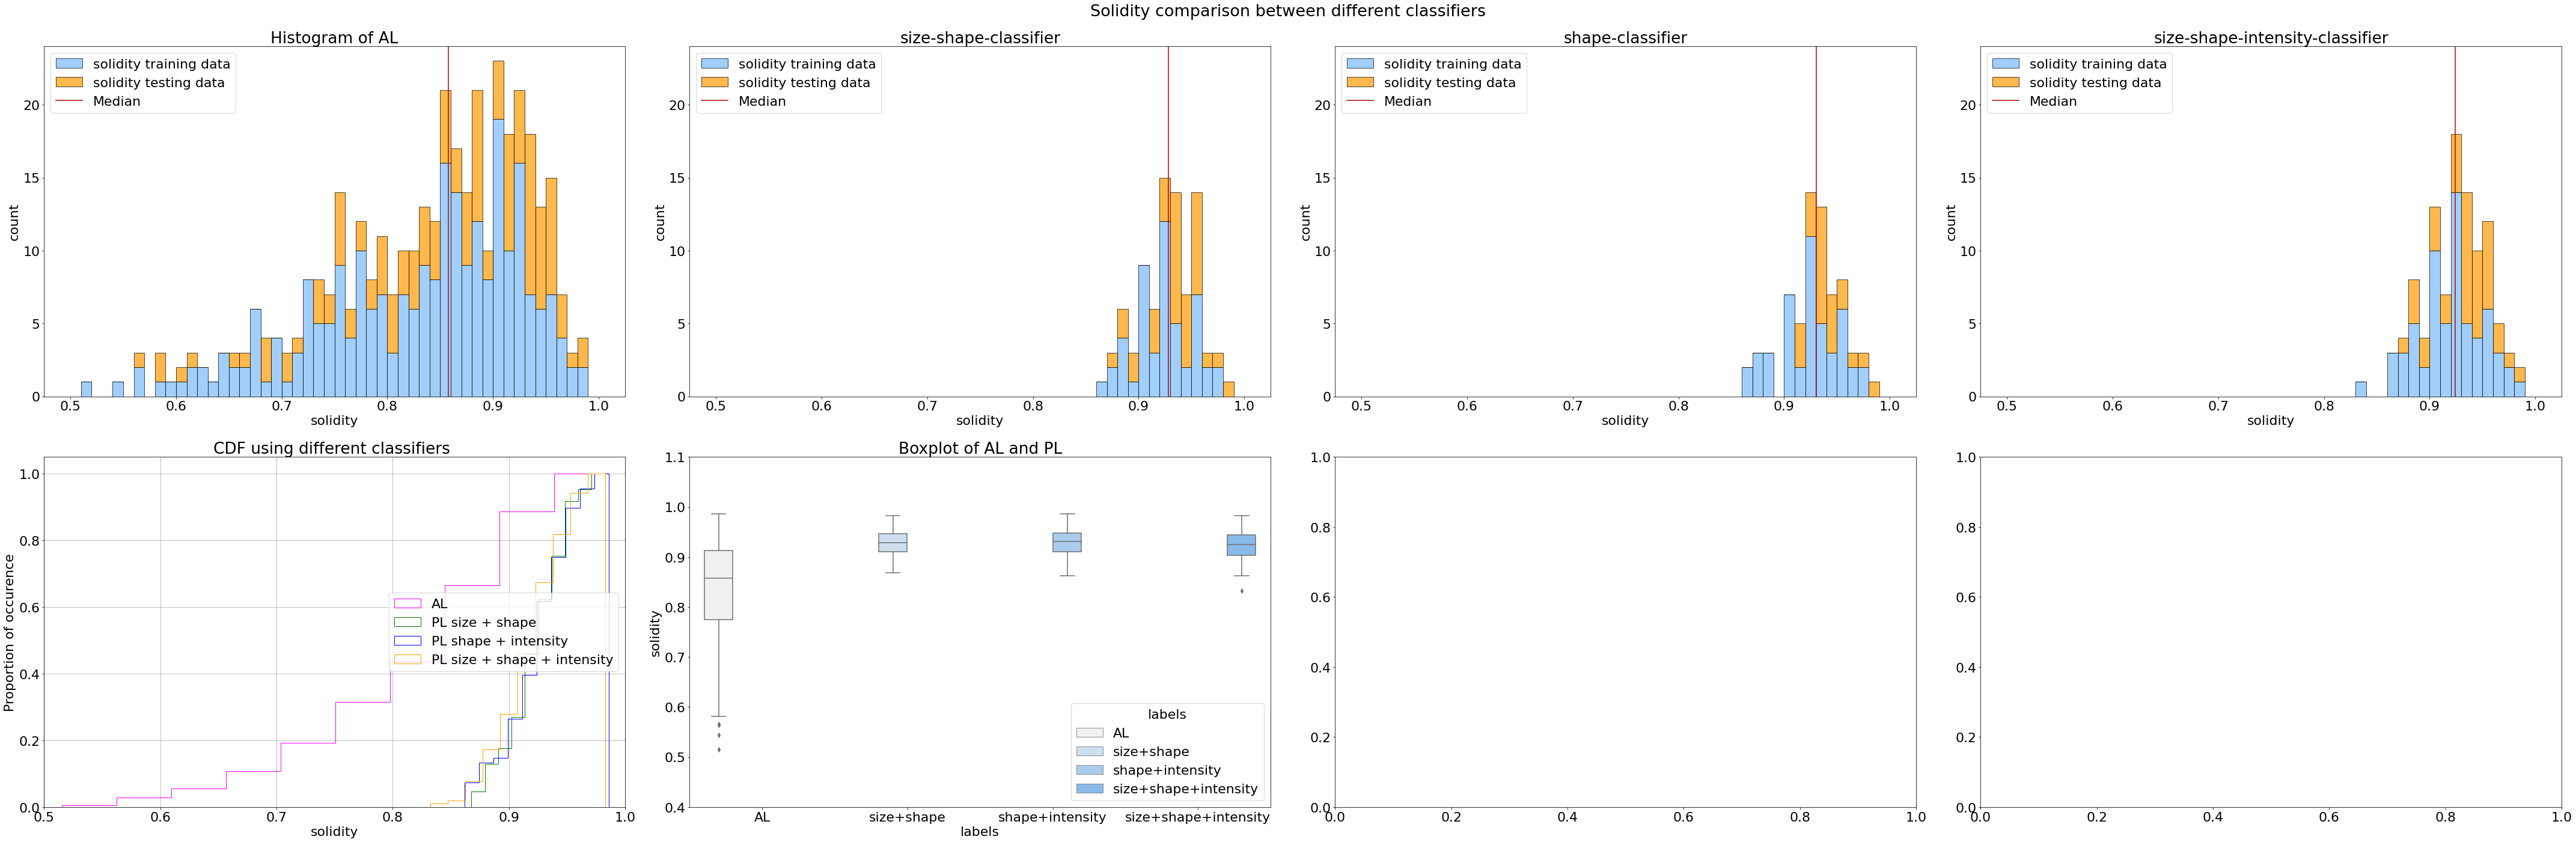

In [13]:
#histogram
# comparison solidity of all bigger crystal labels and selected good crystal labels
fig, axes = plt.subplots(2, 4, figsize=(60,20))
fig.suptitle('Solidity comparison between different classifiers', fontsize = 27)

#solidity measurements all crystal labels 
hist1_all_output = axes[0,0].hist(solidity1_all, bins = 50, label='solidity training data', alpha=0.7, color = '#79bafa', edgecolor='black', range = (0.5,1.0))
axes[0,0].hist(solidity2_all, bins = 50, label='solidity testing data', alpha=0.7, bottom = hist1_all_output[0], color = '#ff9a00', edgecolor='black', range = (0.5,1.0))
axes[0,0].axvline(median_solidity_all, color = '#ae0001', label = 'Median')
axes[0,0].set_xlabel('solidity')
axes[0,0].set_ylabel('count')
axes[0,0].legend()
axes[0,0].set_title('Histogram of AL')
axes[0,0].set_ylim(0,24)

#solidity measurements good crystal labels using classifier trained on size + shape
hist1_output_size_shape = axes[0,1].hist(solidity1_size_shape,bins = 50, label='solidity training data', alpha=0.7, color = '#79bafa', edgecolor='black', range = (0.5,1.0))
axes[0,1].hist(solidity2_size_shape, bins = 50, label='solidity testing data', alpha=0.7,  bottom = hist1_output_size_shape[0], color = '#ff9a00', edgecolor='black', range = (0.5,1.0))
axes[0,1].axvline(median_solidity_good_crystals_size_shape, color = '#ae0001', label = 'Median')
axes[0,1].set_xlabel('solidity')
axes[0,1].set_ylabel('count')
axes[0,1].set_title('size-shape-classifier')
axes[0,1].set_ylim(0,24)
axes[0,1].legend()

#solidity measurements good crystal labels using classifier trained on shape 
hist1_output_shape = axes[0,2].hist(solidity1_shape, bins = 50, label='solidity training data', alpha=0.7, color = '#79bafa', edgecolor='black', range = (0.5,1.0))
axes[0,2].hist(solidity2_shape, bins = 50, label='solidity testing data', alpha=0.7,  bottom = hist1_output_shape[0], color = '#ff9a00', edgecolor='black', range = (0.5,1.0))
axes[0,2].axvline(median_solidity_good_crystals_shape, color = '#ae0001', label = 'Median')
axes[0,2].set_xlabel('solidity')
axes[0,2].set_ylabel('count')
axes[0,2].set_title('shape-classifier')
axes[0,2].set_ylim(0,24)
axes[0,2].legend()

#solidity measurements good crystal labels using classifier trained on size + shape + intensity
hist1_output_size_shape_intensity = axes[0,3].hist(solidity1_size_shape_intensity, bins = 50, label='solidity training data', alpha=0.7, color = '#79bafa', edgecolor='black', range = (0.5,1.0))
axes[0,3].hist(solidity2_size_shape_intensity, bins = 50, label='solidity testing data', alpha=0.7,  bottom = hist1_output_size_shape_intensity[0], color = '#ff9a00', edgecolor='black', range = (0.5,1.0))
axes[0,3].axvline(median_solidity_good_crystals_size_shape_intensity, color = '#ae0001', label = 'Median')
axes[0,3].set_xlabel('solidity')
axes[0,3].set_ylabel('count')
axes[0,3].set_title('size-shape-intensity-classifier')
axes[0,3].set_ylim(0,24)
axes[0,3].legend()

# cumulative distribution function
axes[1,0].hist(solidity_all, density=True, histtype='step', cumulative=True, label='AL', color = 'magenta')
axes[1,0].hist(solidity_size_shape, density=True, histtype='step', cumulative=True, label='PL size + shape', color = 'green')
axes[1,0].hist(solidity_shape_intensity, density=True, histtype='step', cumulative=True, label='PL shape + intensity', color = 'blue')
axes[1,0].hist(solidity_size_shape_intensity, density=True, histtype='step', cumulative=True, label='PL size + shape + intensity',color = 'orange')
axes[1,0].grid(True)
axes[1,0].legend(loc='right')
axes[1,0].set_title('CDF using different classifiers ')
axes[1,0].set_xlabel('solidity')
axes[1,0].set_ylabel('Proportion of occurence')
axes[1,0].set_xlim(0.5,1.0)

#boxplot
AL = pd.DataFrame(solidity_all)
AL['labels'] = ['AL']*len(solidity_all)
PL_size_shape = pd.DataFrame(solidity_size_shape)
PL_size_shape['labels'] = ['size+shape']*len(solidity_size_shape)
PL_shape_intensity = pd.DataFrame(solidity_shape_intensity)
PL_shape_intensity['labels'] = ['shape+intensity']*len(solidity_shape_intensity)
PL_size_shape_intensity = pd.DataFrame(solidity_size_shape_intensity)
PL_size_shape_intensity['labels'] = ['size+shape+intensity']*len(solidity_size_shape_intensity)
boxplot_table = pd.concat([AL, PL_size_shape,PL_shape_intensity, PL_size_shape_intensity], ignore_index = True)
boxplot_all = sns.boxplot(x = 'labels', y = 'solidity',  data = boxplot_table, hue = 'labels', color = '#79bafa', ax = axes[1,1])
axes[1,1].set_ylim([0.4,1.1])
axes[1,1].set_ylabel('solidity')
axes[1,1].set_title('Boxplot of AL and PL')

plt.tight_layout()

#### Filtered-out labels

In [21]:
#numbr of objects in all labels
trends_table_all_both = table_all_both.describe()
counted_objects_all = trends_table_all_both.loc['count']['solidity']
counted_objects_all

378.0

In [22]:
#number of objects in good crystal labels
trends_table_good_crystals_both_size_shape = good_crystals_both_size_shape.describe()
counted_objects_good_crystals_size_shape = trends_table_good_crystals_both_size_shape.loc['count']['solidity']
counted_objects_good_crystals_size_shape

85.0

In [23]:
#number of objects in good crystal labels
trends_table_good_crystals_both_shape = good_crystals_both_shape.describe()
counted_objects_good_crystals_shape = trends_table_good_crystals_both_shape.loc['count']['solidity']
counted_objects_good_crystals_shape

69.0

In [24]:
#number of objects in good crystal labels
trends_table_good_crystals_both_size_shape_intensity = good_crystals_both_size_shape_intensity.describe()
counted_objects_good_crystals_size_shape_intensity = trends_table_good_crystals_both_size_shape_intensity.loc['count']['solidity']
counted_objects_good_crystals_size_shape_intensity

104.0

#### Mann-Whitney U test

In [16]:
#mann-whitney-u-test
mannwhitneyu(solidity_size_shape, solidity_shape_intensity, method='exact')

MannwhitneyuResult(statistic=2843.0, pvalue=0.8648321377503714)

In [17]:
mannwhitneyu(solidity_size_shape, solidity_size_shape_intensity, method='exact')

MannwhitneyuResult(statistic=4756.0, pvalue=0.3706931624831711)

In [18]:
mannwhitneyu(solidity_shape_intensity, solidity_size_shape_intensity, method='exact')

MannwhitneyuResult(statistic=3842.0, pvalue=0.33962174193173117)